# HW 2

ISE-530 Homework II: Chapters III and IV of Cottle-Thapa. Due 11:59 PM Wednesday September 23, 2020

- Exercises 3.3, 3.4, and 3.5.
- Exercises 4.1(a), 4.11, 4.12, 4.14 and 4.18.
- Formulate a linear program for the planar absolute-value regression problem given the 5 points: (-1,-2), (0,0), (1,1), (2,3), and (3,0). Write an AMPL code for the resulting linear program and solve it by a solver.
- Use the same 5 points and same objective as above to determine a planar isotone (i.e, nondecreasing) curve that best fits the given points. Do the same with a convex curve instead. Solve both linear programs using AMPL.

In [1]:
%load_ext nb_black
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300

import numpy as np
import cvxpy as cp
from collections import namedtuple

<IPython.core.display.Javascript object>

---
## Chapter 3

### 3.3

Consider the system of equations

$$
\begin{align}
    4x_1 − x_2 + 5x_3 + 2x_4 + 2x_5 &= 20 \\
    −3x_1 + x_2 +3x_4 −2x_5 &= 18 \\
    2x_1 −4x_2 +10x_3 −6x_4 +8x_5 &= 4.
\end{align}
$$

**(a) Write the matrix $A$ and the vector $b$ such that the given system of equations is the verbose form of $Ax = b$.**

Define:

\begin{equation*}
    \underbrace{
        A = 
        \begin{pmatrix}
        4 & -1 & 5 & 2 & 2 \\
        -3 & 1 & 0 & 3 & -2 \\
        2 & -4 & 10 & -6 & 8 \\
        \end{pmatrix}
    }_{\text{Detached Coefficient Matrix}}
    \,\,,\,\,
    \underbrace{
        \mathbf{x} = 
        \begin{pmatrix}
        x_1 \\
        x_2 \\
        x_3 \\
        x_4 \\
        x_5 \\
        \end{pmatrix}
    }_{\text{Decision Variables}}
    \,\,,\,\,
    \underbrace{
        \mathbf{b} = 
        \begin{pmatrix}
        20 \\
        18 \\
        4 \\
        \end{pmatrix}
    }_{\text{Constraints}}
\end{equation*}

**(b) Identify the matrix $B = [A_{\bullet3} A_{\bullet2} A_{\bullet4}]$ and verify that it is a basis in $A$.**

\begin{align}
    B &= 
    \begin{pmatrix}
    5 & -1 & 2 \\
    0 & 1 & 3 \\
    10 & -4 & -6 \\
    \end{pmatrix} \\
    &\xrightarrow{R_1 - 0.5R_3}
    \begin{pmatrix}
    0 & 1 & 5 \\
    0 & 1 & 3 \\
    10 & -4 & -6 \\
    \end{pmatrix} \\
    &\xrightarrow{R_1 - R_2}
    \begin{pmatrix}
    0 & 0 & 2 \\
    0 & 1 & 3 \\
    10 & -4 & -6 \\
    \end{pmatrix} \\
    &\xrightarrow{0.5R_1}
    \begin{pmatrix}
    0 & 0 & 1 \\
    0 & 1 & 3 \\
    10 & -4 & -6 \\
    \end{pmatrix} \\
    &\xrightarrow{R_2 - 3R_1}
    \begin{pmatrix}
    0 & 0 & 1 \\
    0 & 1 & 0 \\
    10 & -4 & -6 \\
    \end{pmatrix} \\
    &\xrightarrow{R_3 + 4R_2}
    \begin{pmatrix}
    0 & 0 & 1 \\
    0 & 1 & 0 \\
    10 & 0 & -6 \\
    \end{pmatrix} \\
    &\xrightarrow{R_3 + 6R_1}
    \begin{pmatrix}
    0 & 0 & 1 \\
    0 & 1 & 0 \\
    10 & 0 & 0 \\
    \end{pmatrix} \\
    &\xrightarrow{0.1R_3}
    \begin{pmatrix}
    0 & 0 & 1 \\
    0 & 1 & 0 \\
    1 & 0 & 0 \\
    \end{pmatrix} \\
\end{align}

After performing elementary row operations, we see that matrix $B$'s column space contain 3 linearly independent column vectors which span $\mathbb{R}^3$, making it a basis for $A$.

**(c) Compute the basic solution associated with the matrix $B$ (in part(b) above) and verify that it is a nonnegative vector.**

Define:

\begin{equation*}
    B = 
    \begin{pmatrix}
    5 & -1 & 2 \\
    0 & 1 & 3 \\
    10 & -4 & -6 \\
    \end{pmatrix}
    \,\,,\,\,
    N = 
    \begin{pmatrix}
    4 & 2 \\
    -3 & -2 \\
    2 & 8 \\
    \end{pmatrix}
    \,\,,\,\,
    x_B =
    \begin{pmatrix}
    x_3 \\
    x_2 \\
    x_4 \\
    \end{pmatrix}
    \,\,,\,\,
    x_N =
    \begin{pmatrix}
    x_1 \\
    x_5 \\
    \end{pmatrix}
\end{equation*}

\begin{align}
    Ax &= [B N]
    \begin{bmatrix}
    x_B \\
    x_N \\
    \end{bmatrix} \\
    &= Bx_B + Nx_N \\
    &= b \\
    \therefore x_B &= B^{-1}b - B^{-1}Nx_N
\end{align}

(Personal Note: If A was the detached coefficient matrix representing constraints, The corresponding basic solution with matrix $B$ is a basic solution when we set $x_N = 0$ and solve for $x_B$, and is a basic **feasible** solution iff $x_B = B^{-1}b \geq 0$.)

Hence, basic solution:
\begin{align}
    \begin{bmatrix}
        x_B \\
        x_N \\
    \end{bmatrix}
    &=
    \begin{bmatrix}
        B^{-1}b \\
        \vec{0} \\
    \end{bmatrix} \\
    &=
    \begin{bmatrix}
        \begin{pmatrix}
            5 & -1 & 2 \\
            0 & 1 & 3 \\
            10 & -4 & -6 \\
        \end{pmatrix}^{-1} 
        \begin{pmatrix}
        20 \\
        18 \\
        4 \\
        \end{pmatrix} \\
        \vec{0} \\
    \end{bmatrix} \\
    &=
    \begin{bmatrix}
        \begin{pmatrix}
            -0.3 & 0.7 & 0.25 \\
            -1.5 & 2.5 & 0.75 \\
            0.5 & -0.5 & -0.25 \\
        \end{pmatrix}^{-1} 
        \begin{pmatrix}
        20 \\
        18 \\
        4 \\
        \end{pmatrix} \\
        \vec{0} \\
    \end{bmatrix} \\
    &=
    \begin{bmatrix}
        \begin{pmatrix}
            7.6 \\ 
            18 \\
            0 \\
        \end{pmatrix}\\
        \vec{0} \\
    \end{bmatrix} \\
    \begin{bmatrix}
        x_1 \\
        x_2 \\
        x_3 \\
        x_4 \\
        x_5 \\
    \end{bmatrix}
    &= 
    \begin{bmatrix}
        0 \\
        18 \\
        7.6 \\
        0 \\
        0 \\
    \end{bmatrix}
\end{align}

$\therefore$ basic solution associated with matrix $B$ is a non-negative vector.

**(d) What is the index set $N$ of the nonbasic variables in this case?**
[Hint: Although it is not absolutely necessary to do so, you may find it useful to compute the inverse of B in this exercise.]

$N = \{1, 5\}$

### 3.4

Consider the LP

\begin{align}
    \text{maximize } &x_1 + 2x_2 \\
    \text{subject to } 
    &x_1 + x_2 \leq 4 \\
    &−x_1 + x_2 \leq 2 \\
    &\text{and } x_1, x_2 \geq 0 \\
\end{align}

**(a) Plot the feasible region.**

In [2]:
# Create one vector optimization variable.
x = cp.Variable((2,), integer=False)

# Create constraints.
constraints = [
    np.array([[1, 1], [-1, 1]]) @ x <= np.array([4, 2]),
    x >= 0,
]

# Form objective.
obj = cp.Maximize(np.array([1, 2]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 7.0
The optimal solution is: x = [1.0, 3.0]


<IPython.core.display.Javascript object>

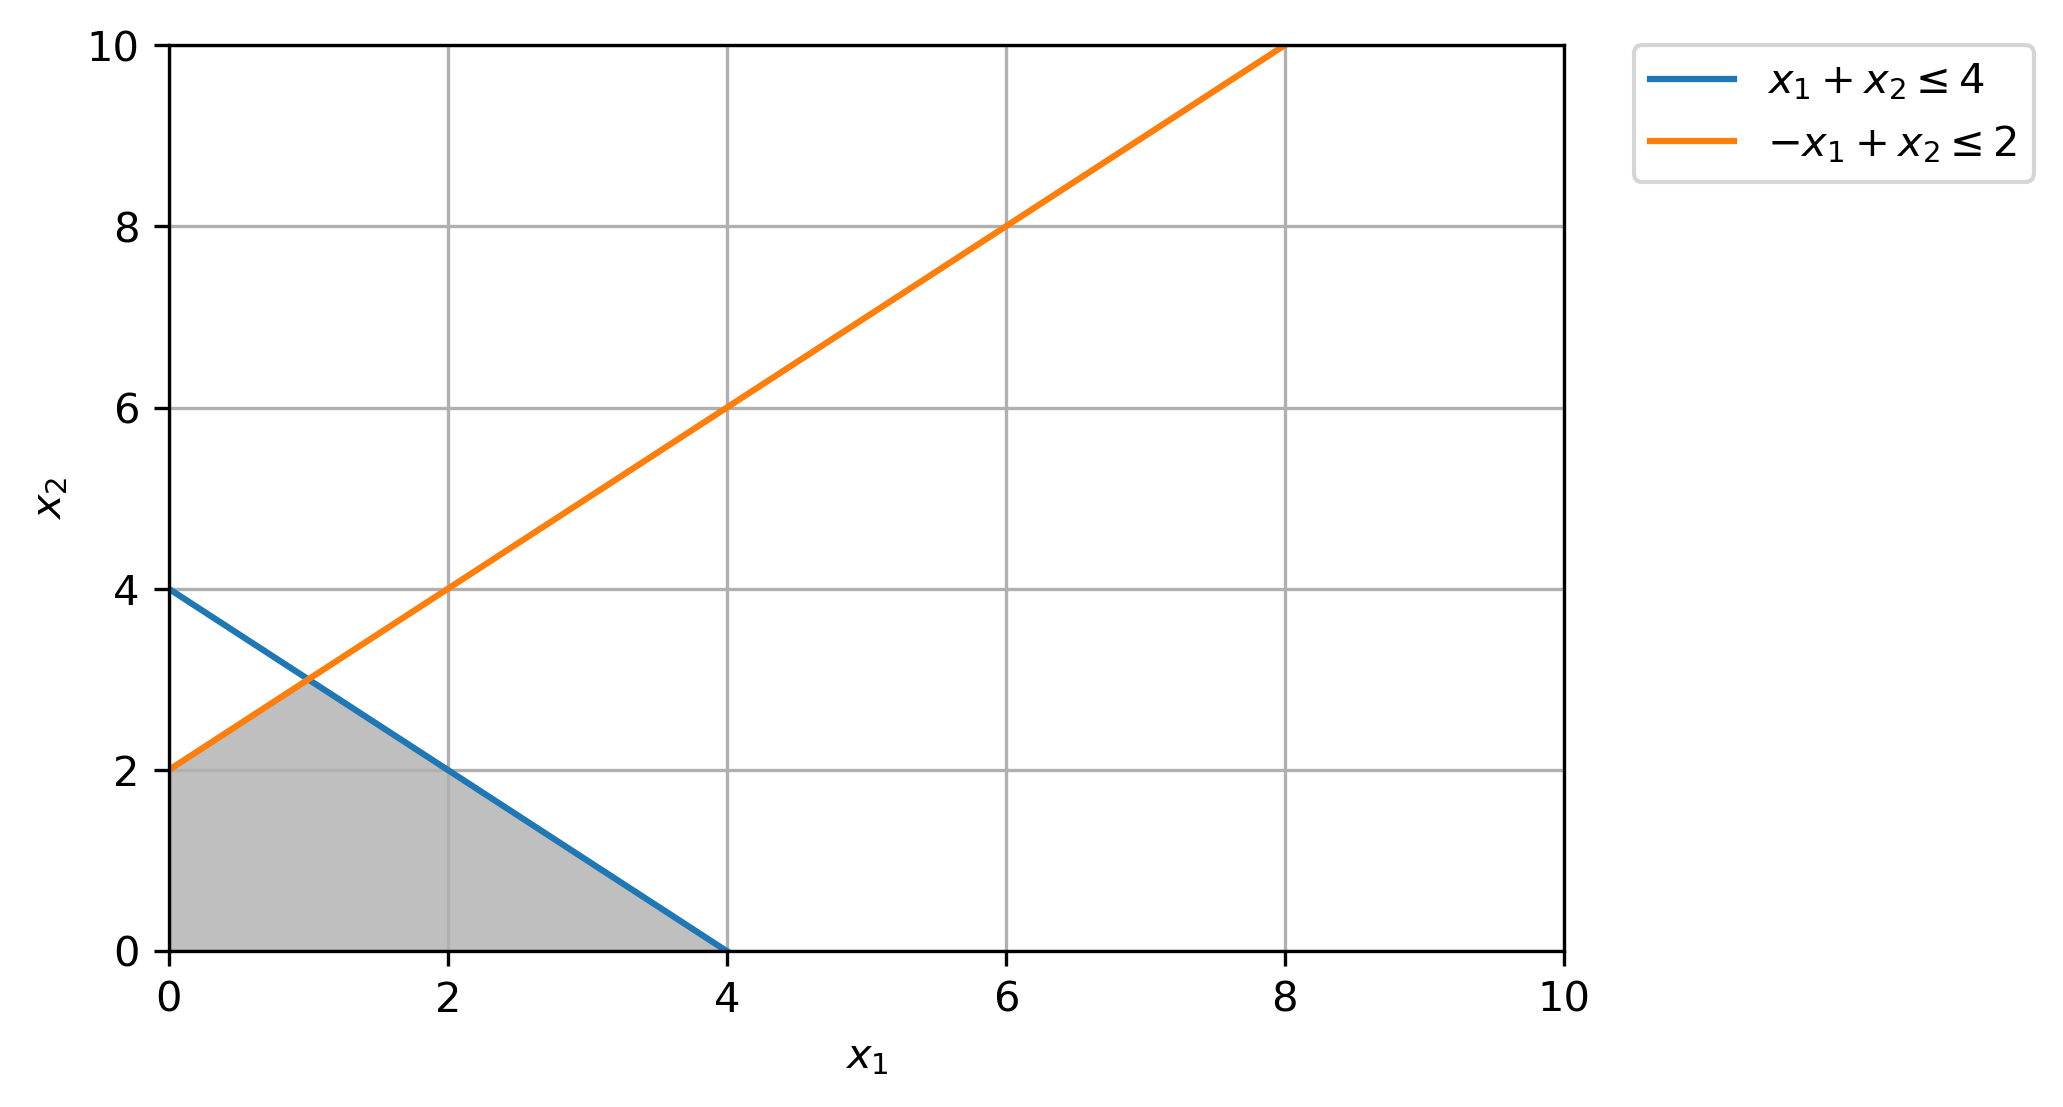

<IPython.core.display.Javascript object>

In [3]:
# Construct lines
x_1 = np.linspace(0, 20, 2000)  # x_1 >= 0
x_2_1 = lambda x_1: -x_1 + 4  # constraint 1: 𝑥1 + 𝑥2 ≤ 4
x_2_2 = lambda x_1: x_1 + 2  # constraint 2: −𝑥1 + 𝑥2 ≤ 2

# Make plot
plt.plot(x_1, x_2_1(x_1), label=r"$x_1 + x_2 \leq 4$")
plt.plot(x_1, x_2_2(x_1), label=r"$-x_1 + x_2 \leq 2$")
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Fill feasible region
y = np.minimum(x_2_1(x_1), x_2_2(x_1))
x = np.zeros(len(x_1))
plt.fill_between(x_1, x, y, where=y > x, color="grey", alpha=0.5)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

**(b) Identify all the basic solutions and specify which are feasible and which are infeasible.**

For a linear inequality system (including equalities) in $n$ variables, a feasible solution is basic if there are $n$ linearly independent active constraints at the given solution. 

Basic Solutions:
- $(x_1=0, x_2=0)$, 2 active constraints, $x_1=0\geq0$ & $x_2=0\geq0$ [Feasible]
- $(x_1=0, x_2=2)$, 2 active constraints, $x_1=0\geq0$ & $−x_1+x_2=0+2=2\leq 2$ [Feasible]
- $(x_1=1, x_2=3)$, 2 active constraints, $x_1+x_2=1+3=4\leq 4$ & $−x_1+x_2=-1+3=2\leq 2$ [Feasible]
- $(x_1=4, x_2=0)$, 2 active constraints, $x_1+x_2=4+0=4\leq 4$ & $x_2\geq0$ [Feasible]

**(c) Solve the problem using the Simplex Algorithm.**

Standard Form:

\begin{align}
    \text{minimize } &z = -x_1 - 2x_2 \\
    \text{subject to } 
    &x_1 + x_2 + s_1 = 4 \\
    &−x_1 + x_2 + s_2 = 2 \\
    &\text{and } x_1, x_2, s_1, s_2 \geq 0 \\
\end{align}

From the Canonical Tableau:

\begin{align}
    &\begin{array}{c}
    \\
    z \\ 
    s_1 \\
    s_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|cccc|c}
      z & x_1 & x_2 & s_1 & s_2 & b \\ \hline
      1 & 1 & 2 & 0 & 0 & 0 \\ \hline
      0 & 1 & 1 & 1 & 0 & 4  \\
      0 & -1 & 1 & 0 & 1 & 2 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_2\,\because \text{Largest non-basic},\,\text{Leaving Variable: }s_2\,\because \text{argmin}\Big(\frac{4}{1}, \frac{2}{1}\Big) = s_2
    \rightarrow&
    \begin{array}{c}
    \\
    z \\ 
    s_1 \\
    x_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|cccc|c}
      z & x_1 & x_2 & s_1 & s_2 & b \\ \hline
      1 & 3 & 0 & 0 & -2 & -4 \\ \hline
      0 & 2 & 0 & 1 & -1 & 2  \\
      0 & -1 & 1 & 0 & 1 & 2 \\
    \end{array}
    \end{bmatrix}
\end{align}

\begin{align}
    \text{Entering Variable: }x_1\,\because \text{Largest non-basic},\,\text{Leaving Variable: }s_1\,\because \text{argmin}\Big(\frac{2}{2}\Big) = s_1
    \rightarrow&
    \begin{array}{c}
    \\
    z \\ 
    x_1 \\
    x_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|cccc|c}
      z & x_1 & x_2 & s_1 & s_2 & b \\ \hline
      1 & 0 & -3 & -3/2 & -1/2 & -7 \\ \hline
      0 & 1 & 0 & 1/2 & -1/2 & 1  \\
      0 & 0 & 1 & 1/2 & 1/2 & 3 \\
    \end{array}
    \end{bmatrix}
\end{align}

$\therefore$ Since the reduced costs are all $\leq 0$ for a **minimization** problem, our simplex method is complete, with basic variables $x_1 = 1, x_2 = 3, s_1 = 0, s_2 = 0$ and our **maximum** objective value is $7.0$.

### 3.5

Consider the LP

\begin{align}
    \text{maximize } &x_1 + x_2 \\
    \text{subject to } 
    &x_1 + x_2 \geq 2 \\
    &−x_1 + x_2 \leq 2 \\
    &\text{and } x_1, x_2 \geq 0 \\
\end{align}

**(a) Plot the feasible region.**

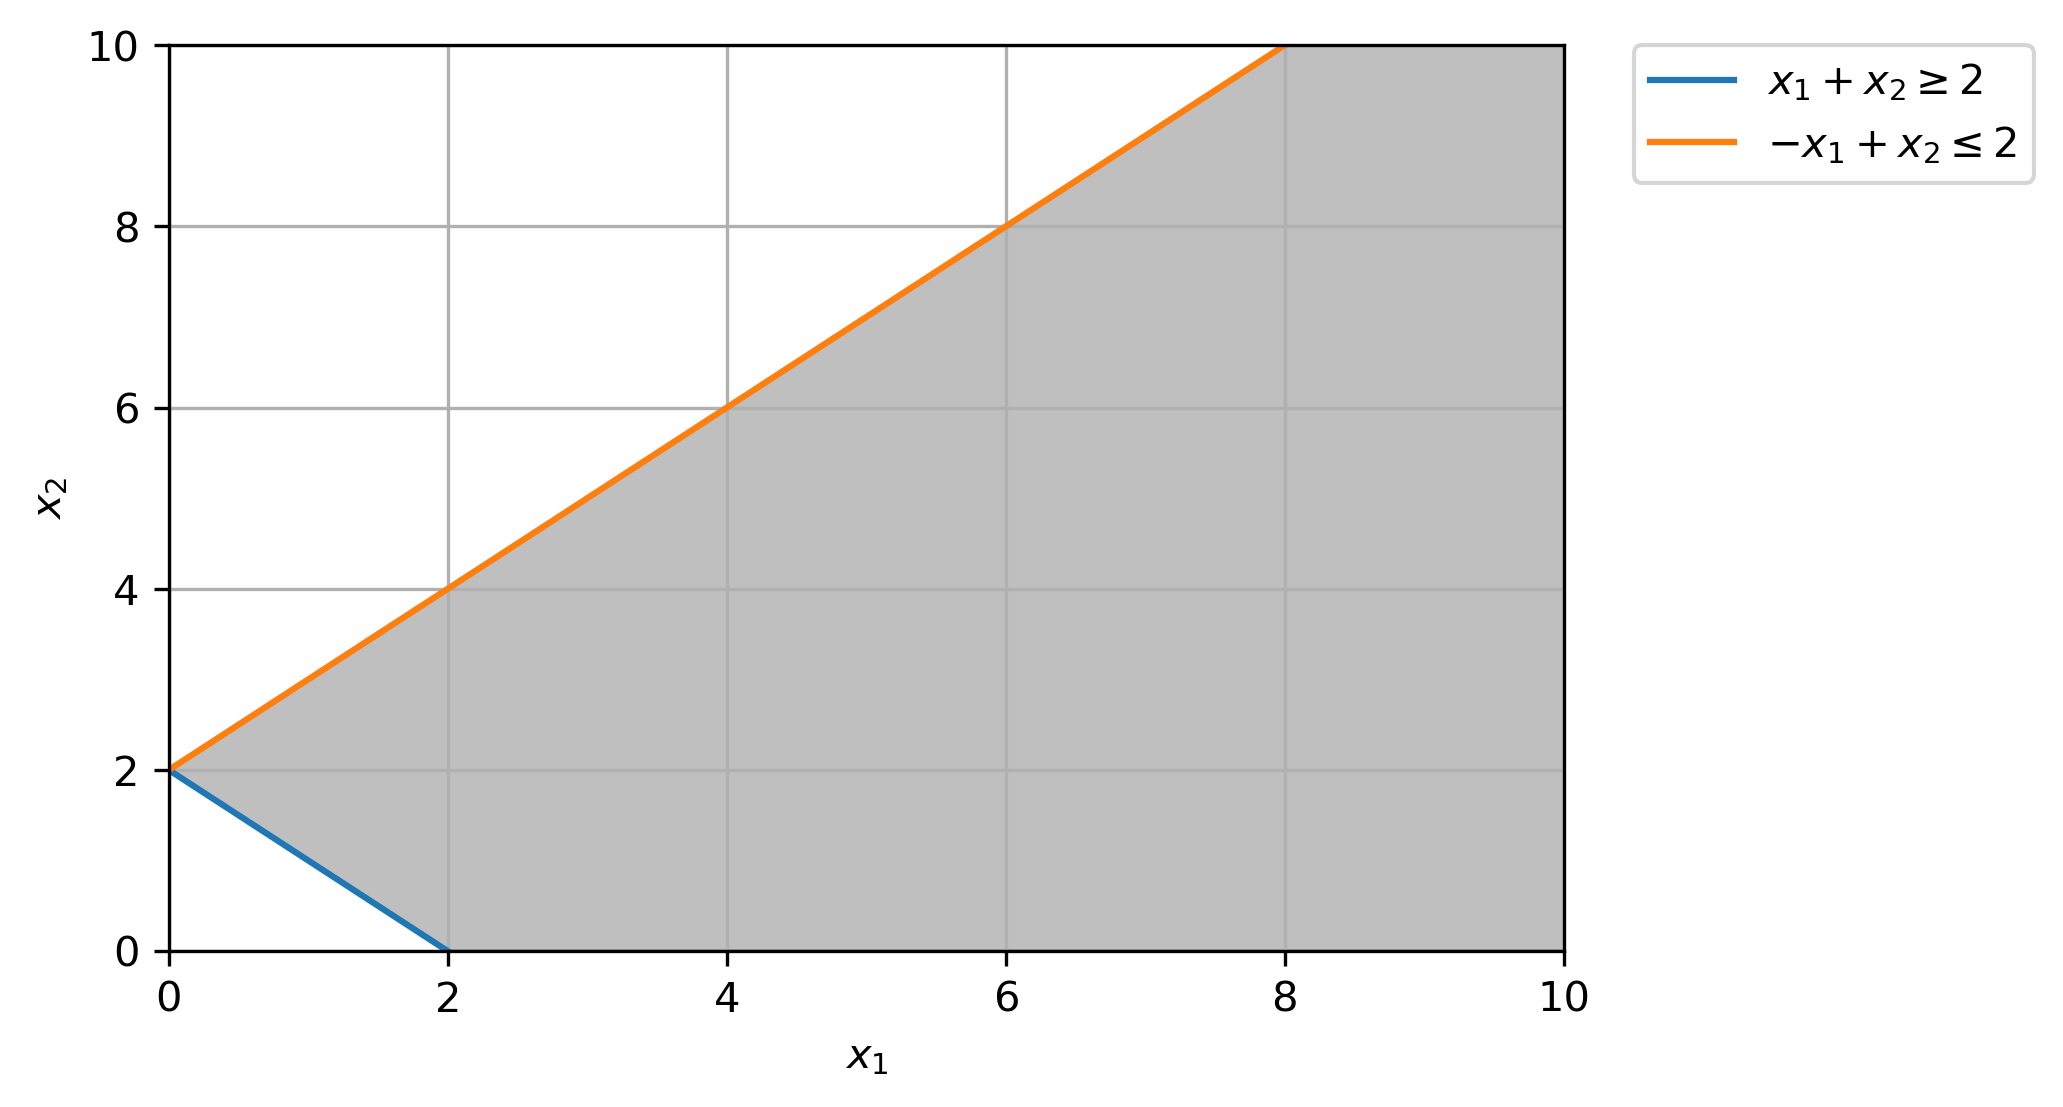

<IPython.core.display.Javascript object>

In [4]:
# Construct lines
x_1 = np.linspace(0, 20, 2000)  # x_1 >= 0
x_2_1 = lambda x_1: -x_1 + 2  # constraint 1: 𝑥1 + 𝑥2 ≥ 2
x_2_2 = lambda x_1: x_1 + 2  # constraint 2: −𝑥1 + 𝑥2 ≤ 2

# Make plot
plt.plot(x_1, x_2_1(x_1), label=r"$x_1 + x_2 \geq 2$")
plt.plot(x_1, x_2_2(x_1), label=r"$-x_1 + x_2 \leq 2$")
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Fill feasible region
y = x_2_2(x_1)
x = np.maximum(x_2_1(x_1), np.zeros(len(x_1)))
plt.fill_between(x_1, x, y, where=y > x, color="grey", alpha=0.5)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

**(b) Identify all the basic solutions and specify which are feasible and which are infeasible.**

For a linear inequality system (including equalities) in $n$ variables, a feasible solution is basic if there are $n$ linearly independent active constraints at the given solution. 

Basic Solutions:
- $(x_1=0, x_2=0)$, 2 active constraints, $x_1=0\geq0$ & $x_2=0\geq0$ [Infeasible]
- $(x_1=2, x_2=0)$, 2 active constraints, $x_1 + x_2 =2+0=2\geq 2$ & $x_2=0\geq0$ [Feasible]

**(c) Solve the LP by the Simplex Algorithm and show that the algorithm stops with the objective function being unbounded over the feasible region.**

Standard Form:

\begin{align}
    \text{minimize } &-x_1 - x_2 \\
    \text{subject to } 
    &x_1 + x_2 - s_1 + y_1 = 2 \\
    &−x_1 + x_2 + s_2 = 2 \\
    &\text{and } x_1, x_2, s_1, s_2, y_1 \geq 0 \\
\end{align}

From Phase I Tableau:

\begin{align}
    &\begin{array}{c}
    \\
    w \\
    z \\ 
    y_1 \\
    s_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccc|c}
      w & z & x_1 & x_2 & s_1 & s_2 & y_1 & b \\ \hline
      1 & 0 & 0 & 0 & 0 & 0 & -1 & 0 \\ \hline
      0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\ \hline
      0 & 0 & 1 & 1 & -1 & 0 & 1 & 2  \\
      0 & 0 & -1 & 1 & 0 & 1 & 0 & 2 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Add 2nd last row to 1st row}
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    y_1 \\
    s_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccc|c}
      w & z & x_1 & x_2 & s_1 & s_2 & y_1 & b \\ \hline
      1 & 0 & 1 & 1 & -1 & 0 & 0 & 2 \\ \hline
      0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\ \hline
      0 & 0 & 1 & 1 & -1 & 0 & 1 & 2  \\
      0 & 0 & -1 & 1 & 0 & 1 & 0 & 2 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_1\,\because \text{Largest non-basic},\,\text{Leaving Variable: }y_1\,\because \text{argmin}\Big(\frac{2}{1}\Big) = y_1
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    x_1 \\
    s_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccc|c}
      w & z & x_1 & x_2 & s_1 & s_2 & y_1 & b \\ \hline
      1 & 0 & 0 & 0 & 0 & 0 & -1 & 0 \\ \hline
      0 & 1 & 0 & 0 & 1 & 0 & -1 & -2 \\ \hline
      0 & 0 & 1 & 1 & -1 & 0 & 1 & 2  \\
      0 & 0 & 0 & 2 & -1 & 1 & 1 & 4 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

This tableau reveals that w, the value of the artificial objective function, has been reduced to zero. Now, in the computation, the 1st row and the $y_1$ column can be ignored (or deleted from the tableau). We can also pick out the basic feasible solution $(x_1, x_2, s_1, s_2) = (2, 0, 0, 4)$ of the original system that has been found by the Phase I Procedure.

Phase II: Normal Simplex Method

\begin{align}
    &\begin{array}{c}
    \\
    z \\ 
    x_1 \\
    s_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|cccc|c}
      z & x_1 & x_2 & s_1 & s_2 & b \\ \hline
      1 & 0 & 0 & 1 & 0 & -2 \\ \hline
      0 & 1 & 1 & -1 & 0 & 2  \\
      0 & 0 & 2 & -1 & 1 & 4 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

$\therefore$ Since, we will choose the entering variable as $s_1$, but the column of $s_1$ has no positive entries, the linear program is unbounded.

**(d) Modify the first inequality constraint to be x1 + x2 ≤ 2 and show that there are infinite optimal solutions.**

Standard Form:

\begin{align}
    \text{minimize } &-x_1 - x_2 \\
    \text{subject to } 
    &x_1 + x_2 + s_1 = 2 \\
    &−x_1 + x_2 + s_2 = 2 \\
    &\text{and } x_1, x_2, s_1, s_2 \geq 0 \\
\end{align}

Canonical Tableau:

\begin{align}
    &\begin{array}{c}
    \\
    z \\ 
    s_1 \\
    s_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|cccc|c}
      z & x_1 & x_2 & s_1 & s_2 & b \\ \hline
      1 & 1 & 1 & 0 & 0 & 0 \\ \hline
      0 & 1 & 1 & 1 & 0 & 2  \\
      0 & -1 & 1 & 0 & 1 & 2 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_1\,\because \text{Largest non-basic},\,\text{Leaving Variable: }s_1\,\because \text{argmin}\Big(\frac{2}{1}\Big) = s_1
    \rightarrow&
    \begin{array}{c}
    \\
    z \\ 
    x_1 \\
    s_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|ccccc|c}
      z & x_1 & x_2 & s_1 & s_2 & b \\ \hline
      1 & 0 & 0 & -1 & 0 & -2 \\ \hline
      0 & 1 & 1 & 1 & 0 & 2  \\
      0 & 0 & 2 & 1 & 1 & 4 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

$\therefore$ Since the reduced costs are all $\leq 0$ for a **minimization** problem, our simplex method is complete, with basic variables $x_1 = 2, s_2 = 4$ and non-basic variables $x_2=0, s_1=0$ and our **maximum** objective value is $2.0$.

In [5]:
# Create one vector optimization variable.
x = cp.Variable((2,), integer=False)

# Create constraints.
constraints = [
    np.array([[1, 1], [-1, 1]]) @ x <= np.array([2, 2]),
    x >= 0,
]

# Form objective.
obj = cp.Minimize(np.array([-1, -1]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: -2.0
The optimal solution is: x = [1.0, 1.0]


<IPython.core.display.Javascript object>

---
## Chapter 4

### 4.1(a) 

Use Phase I and Phase II of the Simplex Algorithm to solve the linear program

\begin{align}
    \text{minimize } &3x_1 - 2x_2 - 3x_3 \\
    \text{subject to } 
    &x_1 + 2x_2 - 3x_3 = 4 \\
    &2x_1 + 3x_2 + x_3 = 7 \\
    &\text{and } x_j \geq 0, j = 1,2,3 \\
\end{align}

Do the computations “by hand.”

From Phase I Tableau:

\begin{align}
    &\begin{array}{c}
    \\
    w \\
    z \\ 
    y_1 \\
    y_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccc|c}
      w & z & x_1 & x_2 & x_3 & y_1 & y_2 & b \\ \hline
      1 & 0 & 0 & 0 & 0 & -1 & -1 & 0 \\ \hline
      0 & 1 & -3 & 2 & 3 & 0 & 0 & 0 \\ \hline
      0 & 0 & 1 & 2 & -3 & 1 & 0 & 4 \\
      0 & 0 & 2 & 3 & 1 & 0 & 1 & 7 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Add last 2 rows to 1st row}
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    y_1 \\
    y_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccc|c}
      w & z & x_1 & x_2 & x_3 & y_1 & y_2 & b \\ \hline
      1 & 0 & 3 & 5 & -2 & 0 & 0 & 11 \\ \hline
      0 & 1 & -3 & 2 & 3 & 0 & 0 & 0 \\ \hline
      0 & 0 & 1 & 2 & -3 & 1 & 0 & 4 \\
      0 & 0 & 2 & 3 & 1 & 0 & 1 & 7 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_2\,\because \text{Largest non-basic},\,\text{Leaving Variable: }y_1\,\because \text{argmin}\Big(\frac{4}{2}, \frac{7}{3}\Big) = y_1
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    x_2 \\
    y_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccc|c}
      w & z & x_1 & x_2 & x_3 & y_1 & y_2 & b \\ \hline
      1 & 0 & 1/2 & 0 & 11/2 & -5/2 & 0 & 1 \\ \hline
      0 & 1 & -4 & 0 & 6 & -1 & 0 & -4 \\ \hline
      0 & 0 & 1/2 & 1 & -3/2 & 1/2 & 0 & 2 \\
      0 & 0 & 1/2 & 0 & 11/2 & -3/2 & 1 & 1 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_3\,\because \text{Largest non-basic},\,\text{Leaving Variable: }y_2\,\because \text{argmin}\Big(\frac{1}{11/2}\Big) = y_2
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    x_2 \\
    x_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccc|c}
      w & z & x_1 & x_2 & x_3 & y_1 & y_2 & b \\ \hline
      1 & 0 & 0 & 0 & 0 & -1 & -1 & 0 \\ \hline
      0 & 1 & -50/11 & 0 & 0 & 7/11 & -12/11 & -56/11 \\ \hline
      0 & 0 & 7/11 & 1 & 0 & 1/11 & 3/11 & 25/11 \\
      0 & 0 & 1/11 & 0 & 1 & -3/11 & 2/11 & 2/11 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

This tableau reveals that w, the value of the artificial objective function, has been reduced to zero. Now, in the computation, the 1st row and the $y_1, y_2$ columns can be ignored (or deleted from the tableau). We can also pick out the basic feasible solution $(x_1, x_2, x_3) = (0, \frac{25}{11}, \frac{2}{11})$ of the original system that has been found by the Phase I Procedure.

Phase II: Normal Simplex Tableau

\begin{align}
    &\begin{array}{c}
    \\
    z \\ 
    x_2 \\
    x_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|ccc|c}
      z & x_1 & x_2 & x_3 & b \\ \hline
      1 & -50/11 & 0 & 0 & -56/11 \\ \hline
      0 & 14/22 & 1 & 0 & 25/11 \\
      0 & 1/11 & 0 & 1 & 2/11 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

$\therefore$ Since the reduced costs are all $\leq 0$ for a **minimization** problem, our simplex method is complete, with basic variables $x_2 = \frac{25}{11}, x_3 = \frac{2}{11}$, non-basic variables $x_1 = 0$ and our **minimum** objective value is $-\frac{56}{11}$.

In [6]:
# Create one vector optimization variable.
x = cp.Variable((3,), integer=False)

# Create constraints.
constraints = [
    np.array([[1, 2, -3], [2, 3, 1]]) @ x == np.array([4, 7]),
    x >= 0,
]

# Form objective.
obj = cp.Minimize(np.array([3, -2, -3]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: -5.09
The optimal solution is: x = [0.0, 2.27, 0.18]


<IPython.core.display.Javascript object>

### 4.11

Solve the following linear program by the Simplex Method

\begin{align}
    \text{minimize } &-4x_1 - 8x_2 + 2x_3 + 4x_4 \\
    \text{subject to } 
    &2x_1 + x_2 + x_3 - 2x_4 \leq 12 \\
    &2x_2 - 2x_3 + x_4 \leq 8 \\
    &4x_1 + x_2 + 2x_3 + 3x_4 \leq 10 \\
    &\text{and } x_j \geq 0, j = 1,2,3,4 \\
\end{align}

Standard Form:

\begin{align}
    \text{minimize } &-4x_1 - 8x_2 + 2x_3 + 4x_4 \\
    \text{subject to } 
    &2x_1 + x_2 + x_3 - 2x_4 + s_1 = 12 \\
    &2x_2 - 2x_3 + x_4 + s_2 = 8 \\
    &4x_1 + x_2 + 2x_3 + 3x_4 + s_3 = 10 \\
    &\text{and } x_j \geq 0, j = 1,2,3,4, s_i \geq 0, i = 1,2,3 \\
\end{align}

From the Canonical Tableau:

\begin{align}
    &\begin{array}{c}
    \\
    z \\ 
    s_1 \\
    s_2 \\
    s_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|ccccccc|c}
      z & x_1 & x_2 & x_3 & x_4 & s_1 & s_2 & s_3 & b \\ \hline
      1 & 4 & 8 & -2 & 4 & 0 & 0 & 0 & 0 \\ \hline
      0 & 2 & 1 & 1 & -2 & 1 & 0 & 0 & 12 \\
      0 & 0 & 2 & -2 & 1 & 0 & 1 & 0 & 8 \\
      0 & 4 & 1 & 2 & 3 & 0 & 0 & 1 & 10 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_2\,\because \text{Largest non-basic},\,\text{Leaving Variable: }s_2\,\because \text{argmin}\Big(\frac{12}{1}, \frac{8}{2}, \frac{10}{1}\Big) = s_2
    \rightarrow&
    \begin{array}{c}
    \\
    z \\ 
    s_1 \\
    x_2 \\
    s_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|ccccccc|c}
      z & x_1 & x_2 & x_3 & x_4 & s_1 & s_2 & s_3 & b \\ \hline
      1 & 4 & 0 & 6 & 0 & 0 & -4 & 0 & -32 \\ \hline
      0 & 2 & 0 & 2 & -2.5 & 1 & -1/2 & 0 & 8 \\
      0 & 0 & 1 & -1 & 1/2 & 0 & 1/2 & 0 & 4 \\
      0 & 4 & 0 & 3 & 2.5 & 0 & -1/2 & 1 & 6 \\
    \end{array}
    \end{bmatrix}
\end{align}

\begin{align}
    \text{Entering Variable: }x_3\,\because \text{Largest non-basic},\,\text{Leaving Variable: }s_3\,\because \text{argmin}\Big(\frac{8}{2}, \frac{6}{3}\Big) = s_3
    \rightarrow&
    \begin{array}{c}
    \\
    z \\ 
    s_1 \\
    x_2 \\
    x_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|ccccccc|c}
      z & x_1 & x_2 & x_3 & x_4 & s_1 & s_2 & s_3 & b \\ \hline
      1 & -4 & 0 & 0 & -5 & 0 & -3 & -2 & -44 \\ \hline
      0 & -2/3 & 0 & 0 & -25/6 & 1 & -1/6 & -2/3 & 4 \\
      0 & 4/3 & 1 & 0 & 4/3 & 0 & 1/3 & 1/3 & 6 \\
      0 & 4/3 & 0 & 1 & 5/6 & 0 & -1/6 & 1/3 & 2 \\
    \end{array}
    \end{bmatrix}
\end{align}

$\therefore$ Since the reduced costs are all $\leq 0$ for a **minimization** problem, our simplex method is complete, with basic variables $x_2 = 6, x_3 = 2, s_1 = 4$, non-basic variables $x_1 = 0, x_4 = 0, s_2 = 0, s_3 = 0$ and our **minimum** objective value is $-44.0$.

In [7]:
# Create one vector optimization variable.
x = cp.Variable((4,), integer=False)

# Create constraints.
constraints = [
    np.array([[2, 1, 1, -2], [0, 2, -2, 1], [4, 1, 2, 3]]) @ x <= np.array([12, 8, 10]),
    x >= 0,
]

# Form objective.
obj = cp.Minimize(np.array([-4, -8, 2, 4]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: -44.0
The optimal solution is: x = [-0.0, 6.0, 2.0, -0.0]


<IPython.core.display.Javascript object>

### 4.12

Solve the following linear program by the Simplex Method

\begin{align}
    \text{minimize } &x_1 + 4x_2 + 6x_3 \\
    \text{subject to } 
    &−2x_1 +4x_2 + x_3 \geq 8 \\
    &x_1 +4x_2 +2x_3 \geq 12 \\
    &2x_1 + 2x_3 \geq 16 \\
    &\text{and } x_j \geq 0, j = 1,2,3 \\
\end{align}

Standard Form with Slack and Artificial Variables:

\begin{align}
    \text{minimize } &x_1 + 4x_2 + 6x_3 \\
    \text{subject to } 
    &−2x_1 +4x_2 + x_3 - s_1 + y_1 = 8 \\
    &x_1 +4x_2 +2x_3 - s_2 + y_2 = 12 \\
    &2x_1 + 2x_3 - s_3 + y_3 = 16 \\
    &\text{and } x_j \geq 0, j = 1,2,3, s_i \geq 0, i = 1,2,3, y_k \geq 0, k = 1,2,3 \\
\end{align}

From the Phase I Tableau:

\begin{align}
    &\begin{array}{c}
    \\
    w \\
    z \\ 
    y_1 \\
    y_2 \\
    y_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccccc|c}
      w & z & x_1 & x_2 & x_3 & s_1 & s_2 & s_3 & y_1 & y_2 & y_3 & b \\ \hline
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & -1 & 0 \\ \hline
      0 & 1 & -1 & -4 & -6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline
      0 & 0 & -2 & 4 & 1 & -1 & 0 & 0 & 1 & 0 & 0 & 8 \\
      0 & 0 & 1 & 4 & 2 & 0 & -1 & 0 & 0 & 1 & 0 & 12 \\
      0 & 0 & 2 & 0 & 2 & 0 & 0 & -1 & 0 & 0 & 1 & 16 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Add last 3 rows to 1st row}
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    y_1 \\
    y_2 \\
    y_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccccc|c}
      w & z & x_1 & x_2 & x_3 & s_1 & s_2 & s_3 & y_1 & y_2 & y_3 & b \\ \hline
      1 & 0 & 1 & 8 & 5 & -1 & -1 & -1 & 0 & 0 & 0 & 36 \\ \hline
      0 & 1 & -1 & -4 & -6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline
      0 & 0 & -2 & 4 & 1 & -1 & 0 & 0 & 1 & 0 & 0 & 8 \\
      0 & 0 & 1 & 4 & 2 & 0 & -1 & 0 & 0 & 1 & 0 & 12 \\
      0 & 0 & 2 & 0 & 2 & 0 & 0 & -1 & 0 & 0 & 1 & 16 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_2\,\because \text{Largest non-basic},\,\text{Leaving Variable: }y_1\,\because \text{argmin}\Big(\frac{8}{4}, \frac{12}{4}\Big) = y_1
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    x_2 \\
    y_2 \\
    y_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccccc|c}
      w & z & x_1 & x_2 & x_3 & s_1 & s_2 & s_3 & y_1 & y_2 & y_3 & b \\ \hline
      1 & 0 & 5 & 0 & 3 & 1 & -1 & -1 & -2 & 0 & 0 & 20 \\ \hline
      0 & 1 & -3 & 0 & -5 & -1 & 0 & 0 & 1 & 0 & 0 & 8 \\ \hline
      0 & 0 & -1/2 & 1 & 1/4 & -1/4 & 0 & 0 & 1/4 & 0 & 0 & 2 \\
      0 & 0 & 3 & 0 & 1 & 1 & -1 & 0 & -1 & 1 & 0 & 4 \\
      0 & 0 & 2 & 0 & 2 & 0 & 0 & -1 & 0 & 0 & 1 & 16 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_1\,\because \text{Largest non-basic},\,\text{Leaving Variable: }y_2\,\because \text{argmin}\Big(\frac{4}{3}, \frac{16}{2}\Big) = y_2
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    x_2 \\
    x_1 \\
    y_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccccc|c}
      w & z & x_1 & x_2 & x_3 & s_1 & s_2 & s_3 & y_1 & y_2 & y_3 & b \\ \hline
      1 & 0 & 0 & 0 & 4/3 & -2/3 & 2/3 & -1 & -1/3 & -5/3 & 0 & 40/3 \\ \hline
      0 & 1 & 0 & 0 & -4 & 0 & -1 & 0 & 0 & 1 & 0 & 12 \\ \hline
      0 & 0 & 0 & 1 & 5/12 & -1/12 & -1/6 & 0 & 1/12 & 1/6 & 0 & 8/3 \\
      0 & 0 & 1 & 0 & 1/3 & 1/3 & -1/3 & 0 & -1/3 & 1/3 & 0 & 4/3 \\
      0 & 0 & 0 & 0 & 4/3 & -2/3 & 2/3 & -1 & 2/3 & -2/3 & 1 & 40/3 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_3\,\because \text{Largest non-basic},\,\text{Leaving Variable: }x_1\,\because \text{argmin}\Big(\frac{8/3}{5/12}, \frac{4/3}{1/3}, \frac{40/3}{4/3}\Big) = x_1
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    x_2 \\
    x_3 \\
    y_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccccc|c}
      w & z & x_1 & x_2 & x_3 & s_1 & s_2 & s_3 & y_1 & y_2 & y_3 & b \\ \hline
      1 & 0 & -4 & 0 & 0 & -2 & 2 & -1 & 1 & -3 & 0 & 8 \\ \hline
      0 & 1 & 12 & 0 & 0 & 4 & -5 & 0 & -4 & 5 & 0 & 28 \\ \hline
      0 & 0 & -5/4 & 1 & 0 & -1/2 & 1/4 & 0 & 1/2 & -1/4 & 0 & 1 \\
      0 & 0 & 3  & 0 & 1 & 1 & -1 & 0 & -1 & 1 & 0 & 4 \\
      0 & 0 & -4 & 0 & 0 & -2 & 2 & -1 & 2 & -2 & 1 & 8 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }s_2\,\because \text{Largest non-basic},\,\text{Leaving Variable: }y_3\,\because \text{argmin}\Big(\frac{1}{1/4}, \frac{8}{2}\Big) = y_3
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    x_2 \\
    x_3 \\
    s_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccccc|c}
      w & z & x_1 & x_2 & x_3 & s_1 & s_2 & s_3 & y_1 & y_2 & y_3 & b \\ \hline
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & -1 & 0 \\ \hline
      0 & 1 & 2 & 0 & 0 & -1 & 0 & -1/2 & 1 & 0 & 5/2 & 48 \\ \hline
      0 & 0 & -3/4 & 1 & 0 & -1/4 & 0 & 1/8 & 1/4 & 0 & -1/8 & 0 \\
      0 & 0 & 1 & 0 & 1 & 0 & 0 & -1/2 & 0 & 0 & 1/2 & 8 \\
      0 & 0 & -2 & 0 & 0 & -1 & 1 & -1/2 & 1 & -1 & 1/2 & 4 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

This tableau reveals that w, the value of the artificial objective function, has been reduced to zero. Now, in the computation, the 1st row and the $y_1, y_2, y_3$ columns can be ignored (or deleted from the tableau). We can also pick out the basic feasible solution $(x_1, x_2, x_3, s_1, s_2, s_3) = (0, 0, 8, 0, 4, 0)$ of the original system that has been found by the Phase I Procedure.

Phase II: Normal Simplex Tableau

\begin{align}
    \begin{array}{c}
    \\
    z \\ 
    x_2 \\
    x_3 \\
    s_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|cccccc|c}
      z & x_1 & x_2 & x_3 & s_1 & s_2 & s_3 & b \\ \hline
      1 & 2 & 0 & 0 & -1 & 0 & -1/2 & 48 \\ \hline
      0 & -3/4 & 1 & 0 & -1/4 & 0 & 1/8 & 0 \\
      0 & 1 & 0 & 1 & 0 & 0 & -1/2 & 8 \\
      0 & -2 & 0 & 0 & -1 & 1 & -1/2 & 4 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_1\,\because \text{Largest non-basic},\,\text{Leaving Variable: }x_3\,\because \text{argmin}\Big(\frac{8}{1}\Big) = x_3
    \rightarrow&
    \begin{array}{c}
    \\
    z \\ 
    x_2 \\
    x_1 \\
    s_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|cccccc|c}
      z & x_1 & x_2 & x_3 & s_1 & s_2 & s_3 & b \\ \hline
      1 & 0 & 0 & -2 & -1 & 0 & 1/2 & 32 \\ \hline
      0 & 0 & 1 & 3/4 & -1/4 & 0 & -1/4 & 6 \\
      0 & 1 & 0 & 1 & 0 & 0 & -1/2 & 8 \\
      0 & 0 & 0 & 2 & -1 & 1 & -3/2 & 20 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

$\therefore$ Since the reduced costs are all $\leq 0$ for a **minimization** problem, our simplex method is complete, with basic variables $x_2 = 6, x_1 = 8, s_2 = 20$, non-basic variables $x_3 = 0, s_1 = 0, s_3 = 0$ and our **minimum** objective value is $32.0$.

In [8]:
# Create one vector optimization variable.
x = cp.Variable((3,), integer=False)

# Create constraints.
constraints = [
    np.array([[2, -4, -1], [-1, -4, -2], [-2, 0, -2]]) @ x <= np.array([-8, -12, -16]),
    x >= 0,
]

# Form objective.
obj = cp.Minimize(np.array([1, 4, 6]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 32.0
The optimal solution is: x = [8.0, 6.0, 0.0]


<IPython.core.display.Javascript object>

### 4.14

Solve the following linear program by the Revised Simplex Method

\begin{align}
    \text{minimize } &3x_1 + x_2 + 4x_3 + 2x_4 \\
    \text{subject to } 
    &x_1 +x_2 −2x_3 + x_4 =10 \\
    &4x_1 +x_2 +2x_3 +3x_4 \geq 20 \\
    &\text{and } x_j \geq 0, j = 1,2,3,4 \\
\end{align}

Standard Form: 

\begin{align}
    \text{minimize } &3x_1 + x_2 + 4x_3 + 2x_4 \\
    \text{subject to } 
    &x_1 +x_2 −2x_3 + x_4 =10 \\
    &4x_1 +x_2 +2x_3 +3x_4 - s_1 = 20 \\
    &\text{and } x_j \geq 0, j = 1,2,3,4, s_1 \geq 0 \\
\end{align}

Phase I Tableau:

\begin{align}
    &\begin{array}{c}
    \\
    w \\
    z \\ 
    y_1 \\
    y_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccc|c}
      w & z & x_1 & x_2 & x_3 & x_4 & s_1 & y_1 & y_2 & b \\ \hline
      1 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & 0 \\ \hline
      0 & 1 & -3 & 1 & -4 & -2 & 0 & 0 & 0 & 0 \\ \hline
      0 & 0 & 1 & 1 & -2 & 1 & 0 & 1 & 0 & 10 \\
      0 & 0 & 4 & 1 & 2 & 3 & -1 & 0 & 1 & 20 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Add last 3 rows to 1st row}
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    y_1 \\
    y_2 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccc|c}
      w & z & x_1 & x_2 & x_3 & x_4 & s_1 & y_1 & y_2 & b \\ \hline
      1 & 0 & 5 & 2 & 0 & 4 & -1 & 0 & 0 & 30 \\ \hline
      0 & 1 & -3 & 1 & -4 & -2 & 0 & 0 & 0 & 0 \\ \hline
      0 & 0 & 1 & 1 & -2 & 1 & 0 & 1 & 0 & 10 \\
      0 & 0 & 4 & 1 & 2 & 3 & -1 & 0 & 1 & 20 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_1\,\because \text{Largest non-basic},\,\text{Leaving Variable: }y_2\,\because \text{argmin}\Big(\frac{10}{1}, \frac{20}{4}\Big) = y_2
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    y_1 \\
    x_1 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccc|c}
      w & z & x_1 & x_2 & x_3 & x_4 & s_1 & y_1 & y_2 & b \\ \hline
      1 & 0 & 0 & 3/4 & -5/2 & 1/4 & 1/4 & 0 & -5/4 & 5 \\ \hline
      0 & 1 & 0 & 7/4 & -5/2 & 1/4 & -3/4 & 0 & 3/4 & 15 \\ \hline
      0 & 0 & 0 & 3/4 & -5/2 & 1/4 & 1/4 & 1 & -1/4 & 5 \\
      0 & 0 & 1 & 1/4 & 1/2 & 3/4 & -1/4 & 0 & 1/4 & 5 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

\begin{align}
    \text{Entering Variable: }x_2\,\because \text{Largest non-basic},\,\text{Leaving Variable: }y_1\,\because \text{argmin}\Big(\frac{5}{3/4}, \frac{5}{1/4}\Big) = y_2
    \rightarrow&
    \begin{array}{c}
    \\
    w \\
    z \\ 
    x_2 \\
    x_1 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccc|c}
      w & z & x_1 & x_2 & x_3 & x_4 & s_1 & y_1 & y_2 & b \\ \hline
      1 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & 0 \\ \hline
      0 & 1 & 0 & 0 & 10/3 & -1/3 & -4/3 & -7/3 & 4/3 & 10/3 \\ \hline
      0 & 0 & 0 & 1 & -10/3 & 1/3 & 1/3 & 4/3 & -1/3 & 20/3 \\
      0 & 0 & 1 & 0 & 4/3 & 2/3 & -1/3 & -1/3 & 1/3 & 10/3 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

This tableau reveals that w, the value of the artificial objective function, has been reduced to zero. Now, in the computation, the 1st row and the $y_1, y_2$ columns can be ignored (or deleted from the tableau). We can also pick out the basic feasible solution $(x_1, x_2, x_3, x_4, s_1) = (10/3, 20/3, 0, 0, 0, 0)$ of the original system that has been found by the Phase I Procedure.

\begin{align}
    \begin{array}{c}
    \\
    z \\ 
    x_2 \\
    x_1 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|ccccc|c}
      z & x_1 & x_2 & x_3 & x_4 & s_1 & b \\ \hline
      1 & 0 & 0 & 10/3 & -1/3 & -4/3 & 10/3 \\ \hline
      0 & 0 & 1 & -10/3 & 1/3 & 1/3 & 20/3 \\
      0 & 1 & 0 & 4/3 & 2/3 & -1/3 & 10/3 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

Revised Simplex Method:

1. Test for Optimality
    1. Find Pricing Vector $y = c_B B^{-1}$
    2. Compute $z_j = c_B B^{-1}N$
    3. Find non-basic index $j$ such that $z_N - c_N = \text{max}_{j\in N}{\{z_j - c_j\}}$. If $z_j - c_j \leq 0$, stop, current BFS is optimal
2. Min. Ratio Test
    1. Find $\bar{A}_{\bullet s} = B^{-1}A_{\bullet s}$
    2. If $\bar{a}_{is} \leq 0$ for all $i$, stop. The objective is unbounded below. Otherwise, find an index $r$ such that $\bar{a}_{is} > 0$ and $\frac{\bar{b}_r}{\bar{a}_{rs}} = \text{min}\Big\{\frac{\bar{b}_i}{\bar{a}_{is}}: \bar{a}_{is} > 0 \Big\}$
3. Update new basis, $A_{\bullet {j_r}}$ replaces $B_{\bullet {j_r}}$

Iteration 1:

1A.
\begin{align}
    y &= {B^\top}^{-1}c_B \\
    &= {\begin{bmatrix} 0 & 1 \\ 1 & 0 \\ \end{bmatrix}^\top}^{-1} \begin{bmatrix}0 \\ 0\\ \end{bmatrix} \\
    &= \begin{bmatrix}0 \\ 0\\ \end{bmatrix} \\
\end{align}

1B.
\begin{align}
    z_j &= y^\top A_{\bullet j} \\
    &= \begin{bmatrix}0 \\ 0\\ \end{bmatrix}^\top \begin{bmatrix} -10/3 & 1/3 & 1/3 \\ 4/3 & 2/3 & -1/3 \\ \end{bmatrix} \\
    &= \begin{bmatrix}0 & 0 & 0 \\ \end{bmatrix} \\
\end{align}

1C.
\begin{align}
    z_s - c_s &= \text{max}_{j\in N}{\{z_j - c_j\}} \\
    &= \text{max}_{j\in N}{\{0+10/3=10/3, 0-1/3=-1/3, 0-4/3=-4/3\}} \\
    s &= 3
\end{align}

2A.
\begin{align}
    \bar{A}_{\bullet s=3} &= B^{-1}A_{\bullet s=3} \\
    &= {\begin{bmatrix} 0 & 1 \\ 1 & 0 \\ \end{bmatrix}}^{-1} \begin{bmatrix}-10/3 \\ 4/3\\ \end{bmatrix} \\
    &= \begin{bmatrix}4/3 \\ -10/3\\ \end{bmatrix} \\
\end{align}

2B.
\begin{align}
    \frac{\bar{b}_r}{\bar{a}_{r3}} &= \text{min}\Big\{\frac{20/3}{4/3} \Big\} = 5 \\
    r &= 2 \\
\end{align}

3.
\begin{align}
    B &= \begin{bmatrix} -10/3 & 1 \\ 4/3 & 0 \\ \end{bmatrix} \\
    x_B &= B^{-1}b = \begin{bmatrix} -10/3 & 1 \\ 4/3 & 0 \\ \end{bmatrix}^{-1} \begin{bmatrix}20/3 \\ 10/3 \\ \end{bmatrix} = \begin{bmatrix}5/2 \\ 15 \\ \end{bmatrix} \\
\end{align}

\begin{align}
\vdots
\end{align}

When all reduced cost coefficients are $\leq 0$, BFS is optimal, hence solution is $(x_1, x_2, x_3, x_4) = (0, 5, 0, 5)$

In [9]:
# Create one vector optimization variable.
x = cp.Variable((4,), integer=False)

# Create constraints.
constraints = [
    np.array([[1, 1, -2, 1]]) @ x == np.array([10]),
    np.array([[4, 1, 2, 3]]) @ x >= np.array([20]),
    x >= 0,
]

# Form objective.
obj = cp.Minimize(np.array([3, 1, 4, 2]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 15.0
The optimal solution is: x = [0.0, 5.0, 0.0, 5.0]


<IPython.core.display.Javascript object>

### 4.18

CT Gift Shop is profitable but has a cash flow problem as of the end of June. December is the busiest month, and the shop expects to make a decent profit by the end of the year. As of the end of June, the gift shop has 2, 000 in cash in the bank. At the start of each month, rent and other bills are due, and the shop has to make the payments. By the end of the month the shop will receive revenues from its sales. The projected revenues and payments are as follows:

<img src="./assets/hw2-4_18.png"/>

CT Gift Shop has an excellent credit history and can take out loans to help cover the shortfalls. On July 1, the gift shop can take out a 6-month loan with a 10% interest rate for the period that is to be paid back at the end of December. The gift shop can also take out a 1-month loan at the start of each month at an interest rate of 2% per month. Formulate CT Gift Shop’s cashflow problem as an LP so to minimize the amount of interest paid. Solve the LP by the Simplex Method.

Linear Program: 

\begin{align}
    \text{minimize } &\begin{bmatrix}0.02 & 0.02 & 0.02 & 0.02 & 0.02 & 0.02 & 0.10\end{bmatrix} \cdot \begin{bmatrix}x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7\\ \end{bmatrix} \\
    &\text{subject to } \\
    &2000 + x_1 + x_7 \geq 6000 \\
    &2000 + x_1 + x_7 - 6000 + 3000 \geq 5000 + 1.02x_1 \\
    &2000 + x_1 + x_7 - 6000 + 3000 + x_2 - 5000 - 1.02x_1 + 3000 \geq 8000 + 1.02x_2 \\
    &2000 + x_1 + x_7 - 6000 + 3000 + x_2 - 5000 - 1.02x_1 + 3000 + x_3 - 8000 - 1.02x_2 + 4000 \geq 3000 + 1.02x_3 \\
    &2000 + x_1 + x_7 - 6000 + 3000 + x_2 - 5000 - 1.02x_1 + 3000 + x_3 - 8000 - 1.02x_2 + 4000 + x_4 - 3000 - 1.02x_3 + 4000 \geq 4000 + 1.02x_4 \\
    &2000 + x_1 + x_7 - 6000 + 3000 + x_2 - 5000 - 1.02x_1 + 3000 + x_3 - 8000 - 1.02x_2 + 4000 + x_4 - 3000 - 1.02x_3 + 4000 + x_5 - 4000 - 1.02x_4 + 9000 \geq 6000 + 1.02x_5 \\
    &2000 + x_1 + x_7 - 6000 + 3000 + x_2 - 5000 - 1.02x_1 + 3000 + x_3 - 8000 - 1.02x_2 + 4000 + x_4 - 3000 - 1.02x_3 + 4000 + x_5 - 4000 - 1.02x_4 + 9000 + x_6 - 6000 - 1.02x_5 + 15000 \geq 1.10x_7 + 1.02x_6 \\
    &x_i \geq 0, i = 1, \cdots 7 \\
\end{align}

$x_1, \cdots x_6$ represent the 1-month loan amounts and $x_7$ represents the 6-month loan amount.

Standard Form: 

\begin{align}
    \text{minimize } &0.02x_1 + 0.02x_2 + 0.02x_3 + 0.02x_4 + 0.02x_5 + 0.02x_6 + 0.1x_7 \\
    \text{subject to } 
    &x_1 + x_7 - s_1 = 4000 \\
    &-0.02x_1 + x_7 - s_2 = 6000 \\
    &-0.02x_1 -0.02x_2 + x_7 - s_3 = 11000 \\
    &-0.02x_1 -0.02x_2 -0.02x_3 + x_7 - s_4 = 10000 \\
    &-0.02x_1 -0.02x_2 -0.02x_3 -0.02x_4 + x_7 - s_5 = 10000 \\
    &-0.02x_1 -0.02x_2 -0.02x_3 -0.02x_4 -0.02x_5 + x_7 - s_5 = 7000 \\
    &0.02x_1 +0.02x_2 +0.02x_3 +0.02x_4 +0.02x_5 +0.02x_6 + 0.1x_7 + s_5 = 8000 \\
    &\text{and } x_j \geq 0, j = 1,\cdots7, s_i \geq 0, i = 1, \cdots 5 \\
\end{align}

Standard Form with artificial variables: 

\begin{align}
    \text{minimize } &0.02x_1 + 0.02x_2 + 0.02x_3 + 0.02x_4 + 0.02x_5 + 0.02x_6 + 0.1x_7 \\
    \text{subject to } 
    &x_1 + x_7 - s_1 + y_1 = 4000 \\
    &-0.02x_1 + x_7 - s_2 + y_2 = 6000 \\
    &-0.02x_1 -0.02x_2 + x_7 - s_3 + y_3 = 11000 \\
    &-0.02x_1 -0.02x_2 -0.02x_3 + x_7 - s_4 + y_4 = 10000 \\
    &-0.02x_1 -0.02x_2 -0.02x_3 -0.02x_4 + x_7 - s_5 + y_5 = 10000 \\
    &-0.02x_1 -0.02x_2 -0.02x_3 -0.02x_4 -0.02x_5 + x_7 - s_5 + y_6 = 7000 \\
    &0.02x_1 +0.02x_2 +0.02x_3 +0.02x_4 +0.02x_5 +0.02x_6 + 0.1x_7 + s_5 + y_7 = 8000 \\
    &\text{and } x_j \geq 0, j = 1,\cdots7, s_i \geq 0, i = 1, \cdots, 5, y_k \geq 0, k = 1, \cdots, 7 \\
\end{align}

Phase I Tableau:

\begin{align}
    &\begin{array}{c}
    \\
    w \\
    z \\ 
    y_1 \\
    y_2 \\
    y_3 \\
    y_4 \\
    y_5 \\
    y_6 \\
    y_7 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|c|ccccccccccccccccccc|c}
      w & z & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 & x_7 & s_1 & s_2 & s_3 & s_4 & s_5 & y_1 & y_2 & y_3 & y_4 & y_5 & y_6 & y_7 & b \\ \hline
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & -1 & -1 & -1 & -1 & -1 & 0 \\ \hline
      0 & 1 & -0.02 & -0.02 & -0.02 & -0.02 & -0.02 & -0.02 & -0.1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline
      0 & 0 & -0.02 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & -1 & -1 & -1 & -1 & -1 & 0 \\ \hline
    \end{array}
    \end{bmatrix} \\
\end{align}

---
## Extra

**Formulate a linear program for the planar absolute-value regression problem given the 5 points: (-1,-2), (0,0), (1,1), (2,3), and (3,0). Write an AMPL code for the resulting linear program and solve it by a solver.**

\begin{align}
    \underset{w, \alpha, t}{\text{minimize }} &\frac{1}{N}\sum_{i=1}^N (t^+_i + t^-_i) \\
    \text{subject to } 
    &t^+_i - t^-_i + wx_i + \alpha = y_i, i = 1, \cdots, N \\
    &\text{and } t^+_i, t^-_i \geq 0 \\
\end{align}

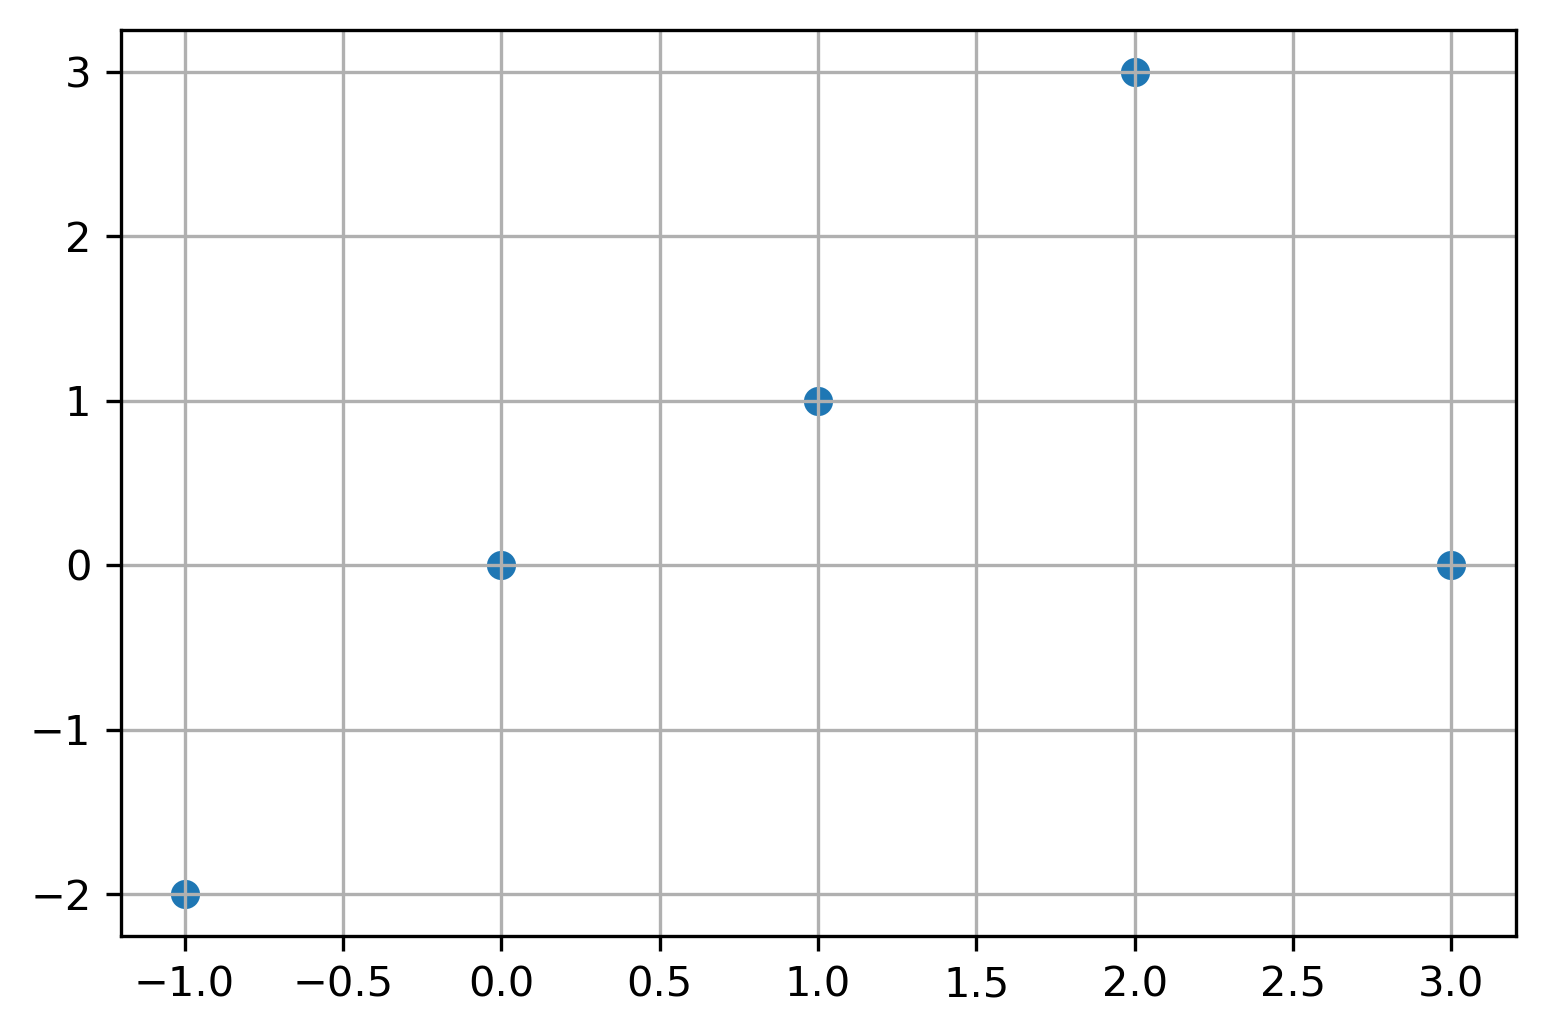

<IPython.core.display.Javascript object>

In [10]:
points = np.array(
    sorted([[-1, -2], [0, 0], [1, 1], [2, 3], [3, 0]], key=lambda x: x[0])
)
plt.scatter(*list(zip(*points)))
plt.grid(True)
plt.show()

In [11]:
# Create optimization variables
t = cp.Variable((len(points), 2), integer=False)  # Absolute Deviations
w = cp.Variable((1,), integer=False)  # Weights
α = cp.Variable((1,), integer=False)  # Bias

# Create constraints.
constraints = [
    t @ np.array([1, -1]) + (w * points[:, 0] + α) == points[:, 1],
    t >= 0,
]

# Form objective.
obj = cp.Minimize(np.ones((1, len(points))) @ (t @ np.array([[1], [1]])) / len(points))

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"Residuals: t = {np.max(np.round(t.value, 2), axis=1)}")
print(f"y = {np.round(w.value, 2)[0]}x {np.round(α.value, 2)[0]}")

Linear Programming Solution
Status: optimal
The optimal value is: 1.0
Residuals: t = [0.19 0.4  0.   0.6  3.81]
y = 1.4x -0.4


<IPython.core.display.Javascript object>

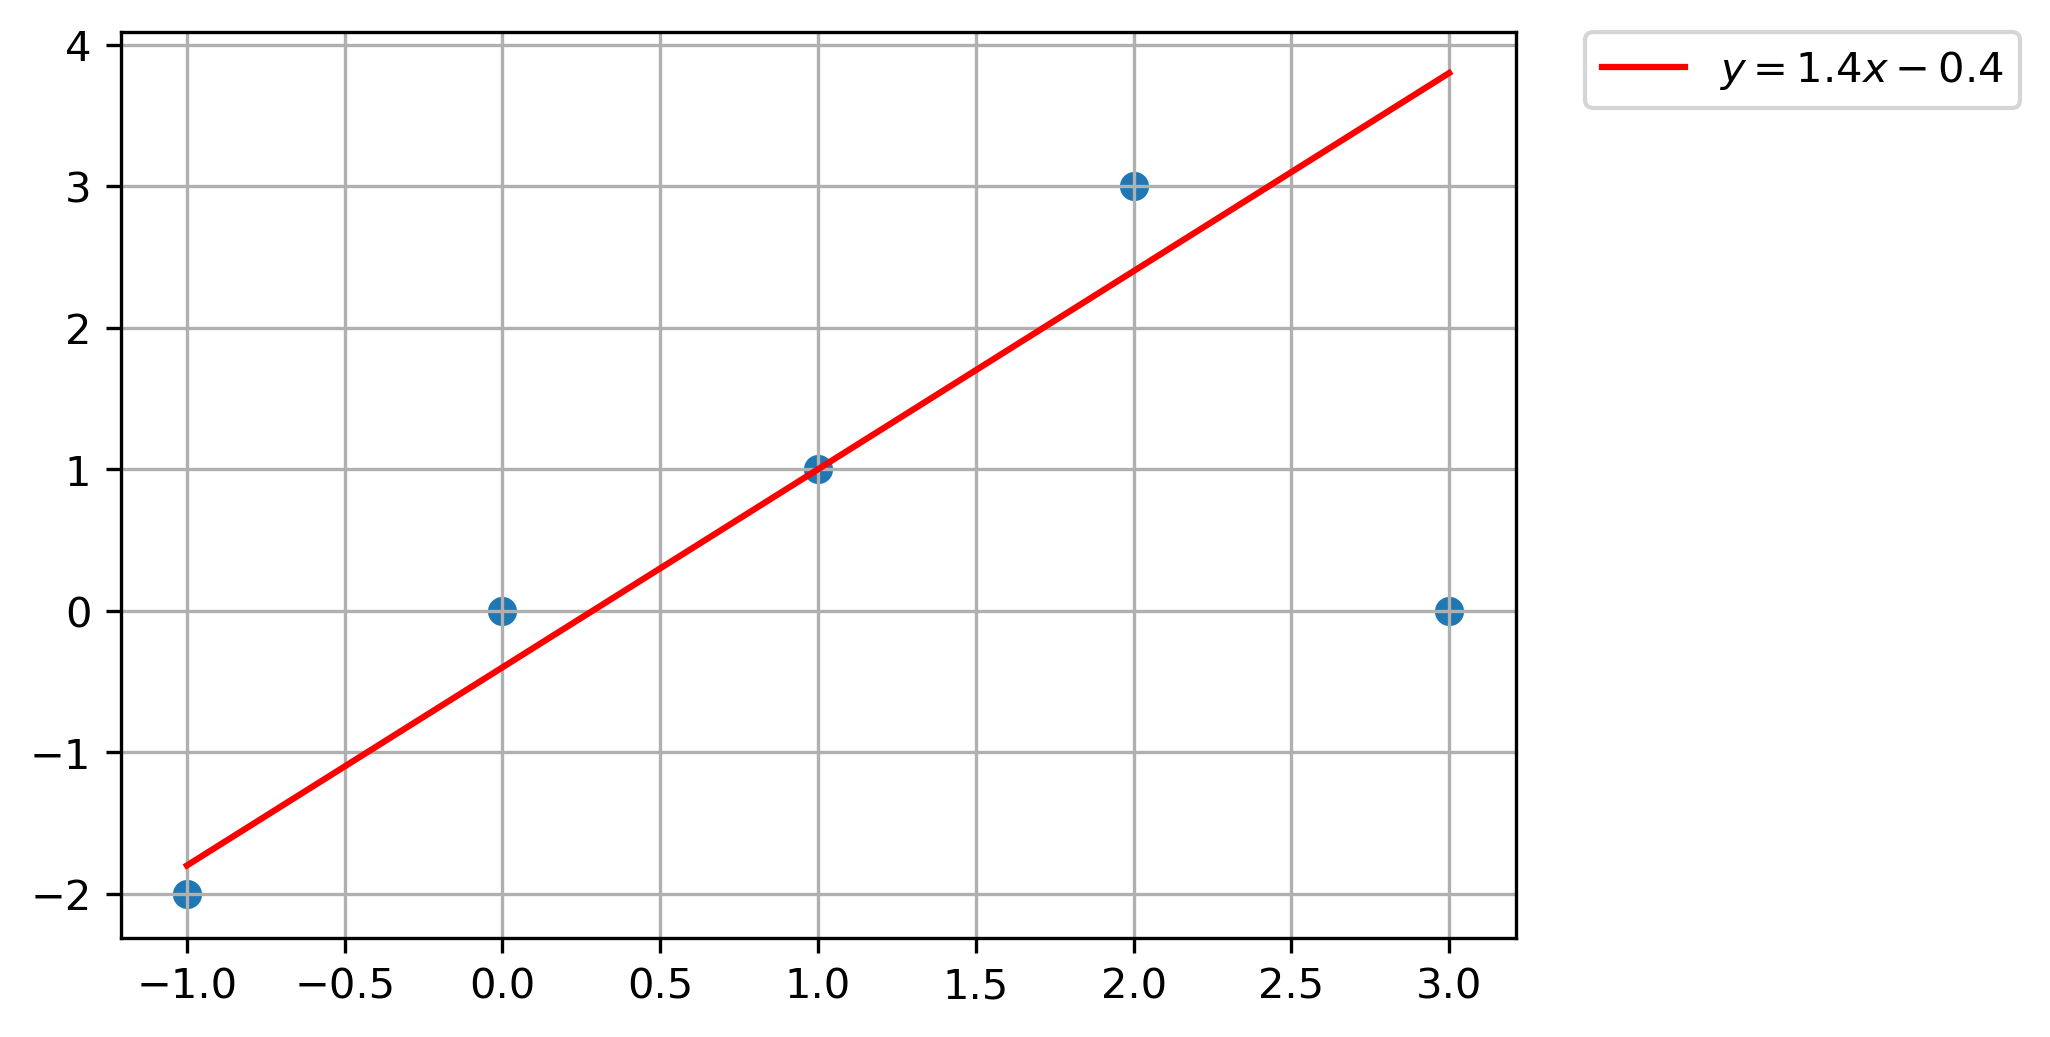

<IPython.core.display.Javascript object>

In [12]:
plt.plot(
    np.linspace(-1, 3, 2000),
    np.round(w.value, 2)[0] * np.linspace(-1, 3, 2000) + np.round(α.value, 2)[0],
    c="red",
    label=r"$y = 1.4x - 0.4$",
)
plt.scatter(*list(zip(*points)))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

**Use the same 5 points and same objective as above to determine a planar isotone (i.e, nondecreasing) curve that best fits the given points. Do the same with a convex curve instead. Solve both linear programs using AMPL.**

Isotonic Regression QP (Minimize Squared errors):

\begin{align}
    \underset{w, \alpha}{\text{minimize }} &\sum_{i=1}^N w_i{(x_i - \alpha_i)}^2 \\
    \text{subject to } 
    &x_i \leq x_{i+1}, i = 1, \cdots, N-1 \\
\end{align}

Isotonic Regression (Minimize Absolute errors):

\begin{align}
    \underset{\hat{y}_i}{\text{minimize }} &\sum_{i=1}^N \vert y_i - \hat{y}_i \vert \\
    \text{subject to } 
    &\hat{y}_i <= \hat{y}_{i+1} , i = 1, \cdots, N-1 \\
\end{align}

LP Formulation:

\begin{align}
    \underset{\hat{y}_i}{\text{minimize }} &\sum_{i=1}^N (t^+_i - t^-_i) \\
    \text{subject to } 
    &t^+_i - t^-_i + \hat{y}_i = y_i \\
    &\hat{y}_i \leq \hat{y}_{i+1} , i = 1, \cdots, N-1 \\
    &\text{and } t^+_i, t^-_i \geq 0 \\
\end{align}

In [13]:
# Create optimization variables
t = cp.Variable((len(points), 2), integer=False)  # Absolute Deviations
y = cp.Variable((len(points),), integer=False)  # y predictions

# Create constraints.
constraints = [y_i <= y_j for y_i, y_j in zip(y, y[1:])] + [
    t @ np.array([1, -1]) + y == points[:, 1],
    t >= 0,
]

# Form objective.
obj = cp.Minimize(np.ones((1, len(points))) @ (t @ np.array([[1], [1]])))

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"Residuals: t = {np.max(np.round(t.value, 2), axis=1)}")
print(f"y = {np.round(y.value, 2)}")

Linear Programming Solution
Status: optimal
The optimal value is: 3.0
Residuals: t = [-0.    0.   -0.    1.52  1.48]
y = [-2.   -0.    1.    1.48  1.48]


<IPython.core.display.Javascript object>

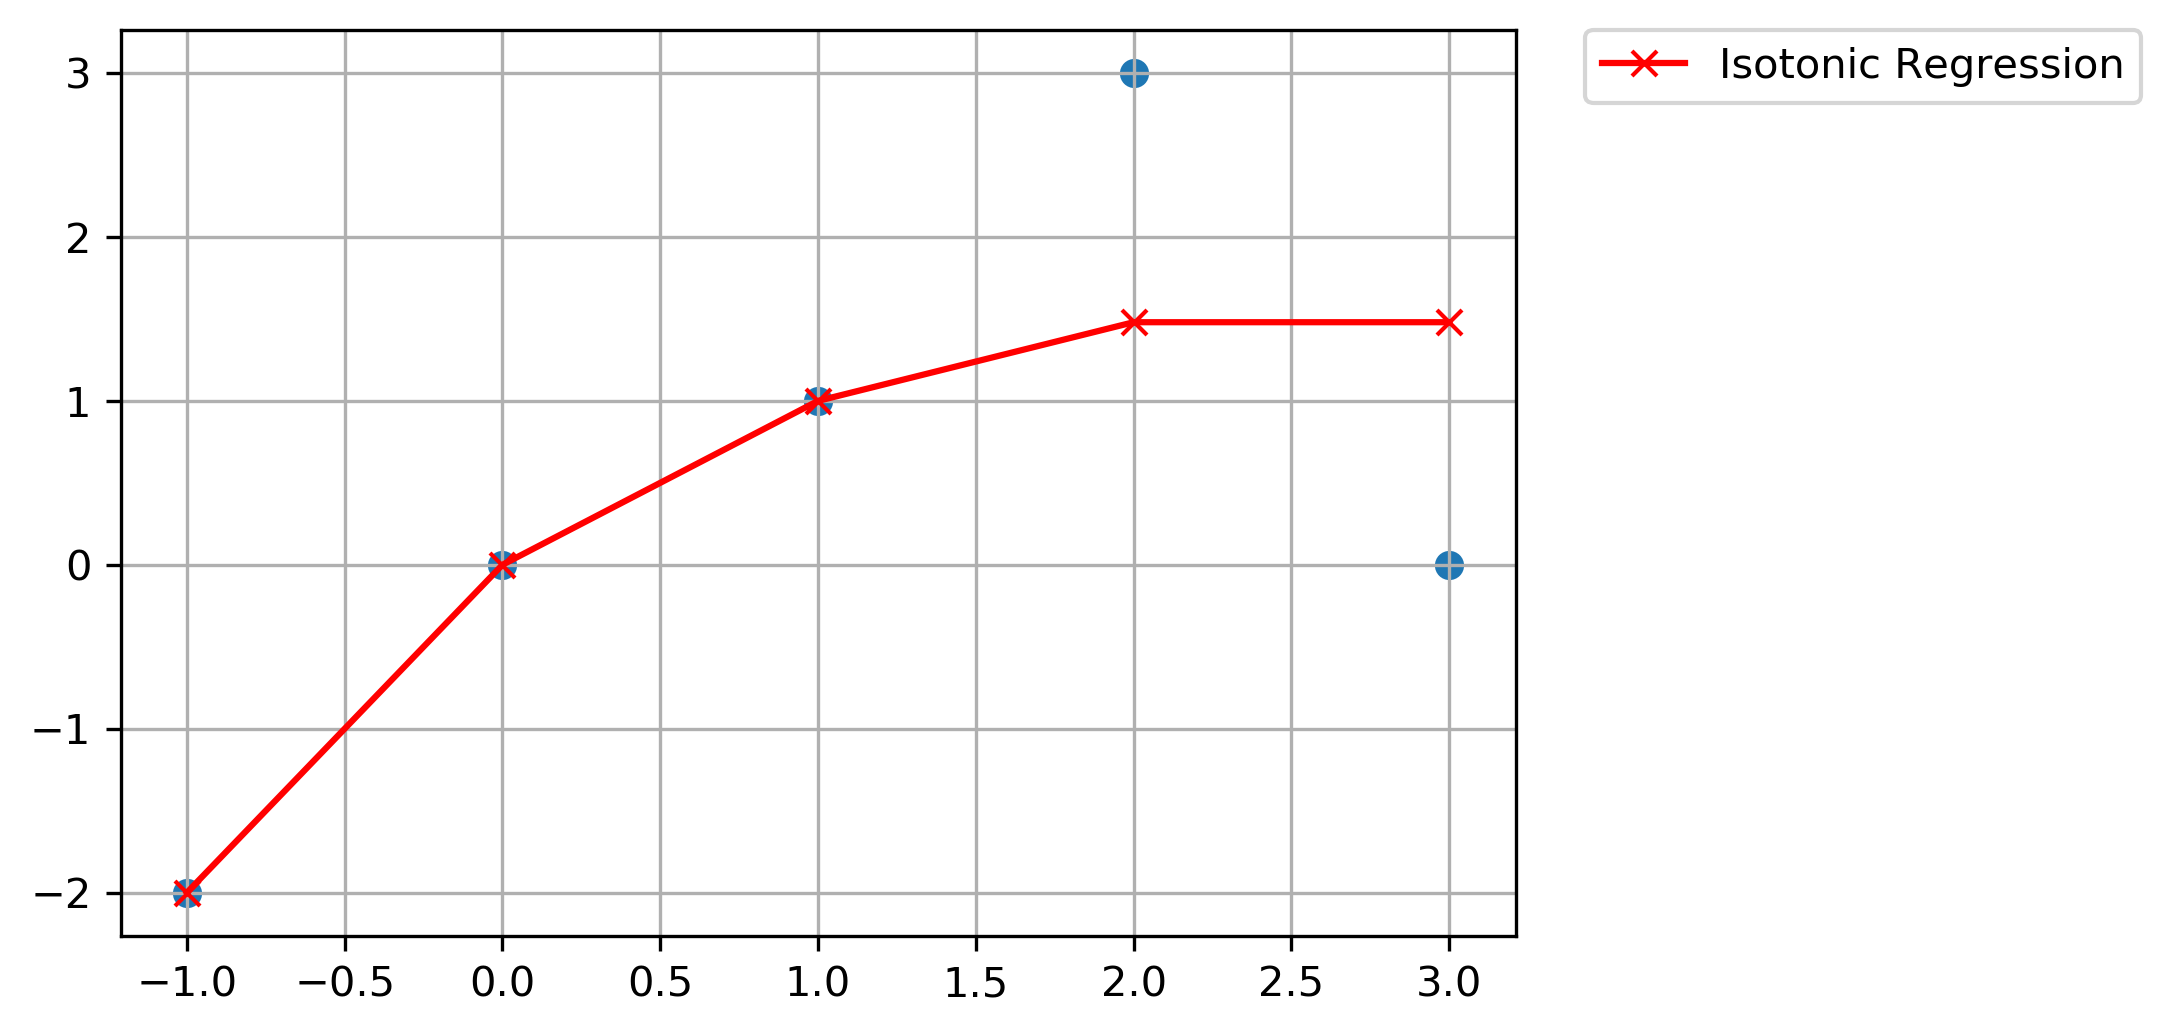

<IPython.core.display.Javascript object>

In [14]:
plt.plot(
    points[:, 0], np.round(y.value, 2), "-x", c="red", label=r"Isotonic Regression",
)
plt.scatter(*list(zip(*points)))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

Convex Regression:

\begin{align}
    \underset{\hat{y}_i}{\text{minimize }} &\sum_{i=1}^N \vert y_i - \hat{y}_i \vert \\
    \text{subject to } 
    & \frac{hat{y}_{i+1} - \hat{y}_i}{x_{i+1} - x_{i}} <= \frac{hat{y}_{i+2} - \hat{y}_{i+1}}{x_{i+2} - x_{i+1}} , i = 1, \cdots, N-2 \\
\end{align}

LP Formulation:

\begin{align}
    \underset{\hat{y}_i}{\text{minimize }} &\sum_{i=1}^N (t^+_i - t^-_i) \\
    \text{subject to } 
    &t^+_i - t^-_i + \hat{y}_i = y_i \\
    & \frac{\hat{y}_{i+1} - \hat{y}_i}{x_{i+1} - x_{i}} <= \frac{\hat{y}_{i+2} - \hat{y}_{i+1}}{x_{i+2} - x_{i+1}} , i = 1, \cdots, N-2 \\
    &\text{and } t^+_i, t^-_i \geq 0 \\
\end{align}

Change fractional constraints by clearing denominator:

\begin{align}
    \underset{\hat{y}_i}{\text{minimize }} &\sum_{i=1}^N (t^+_i - t^-_i) \\
    \text{subject to } 
    &t^+_i - t^-_i + \hat{y}_i = y_i \\
    & (x_{i+1} - x_{i+2})\hat{y}_{i} + (x_{i+2} - x_{i})\hat{y}_{i+1} + (x_{i} - x_{i+1})\hat{y}_{i+2} \leq 0 , i = 1, \cdots, N-2 \\
    &\text{and } t^+_i, t^-_i \geq 0 \\
\end{align}

In [15]:
# Create optimization variables
t = cp.Variable((len(points), 2), integer=False)  # Absolute Deviations
y = cp.Variable((len(points),), integer=False)  # y predictions

# Create constraints.
constraints = [
    (x_j - x_k) * y_i + (x_k - x_i) * y_j + (x_i - x_j) * y_k <= 0
    for y_i, y_j, y_k, x_i, x_j, x_k in zip(
        y, y[1:], y[2:], points, points[1:], points[2:]
    )
] + [t @ np.array([1, -1]) + y == points[:, 1], t >= 0]

# Form objective.
obj = cp.Minimize(np.ones((1, len(points))) @ (t @ np.array([[1], [1]])))

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"Residuals: t = {np.max(np.round(t.value, 2), axis=1)}")
print(f"y = {np.round(y.value, 2)}")

Linear Programming Solution
Status: optimal
The optimal value is: 6.0
Residuals: t = [1.87 0.   0.87 2.61 0.66]
y = [-0.13 -0.    0.13  0.39  0.66]


<IPython.core.display.Javascript object>

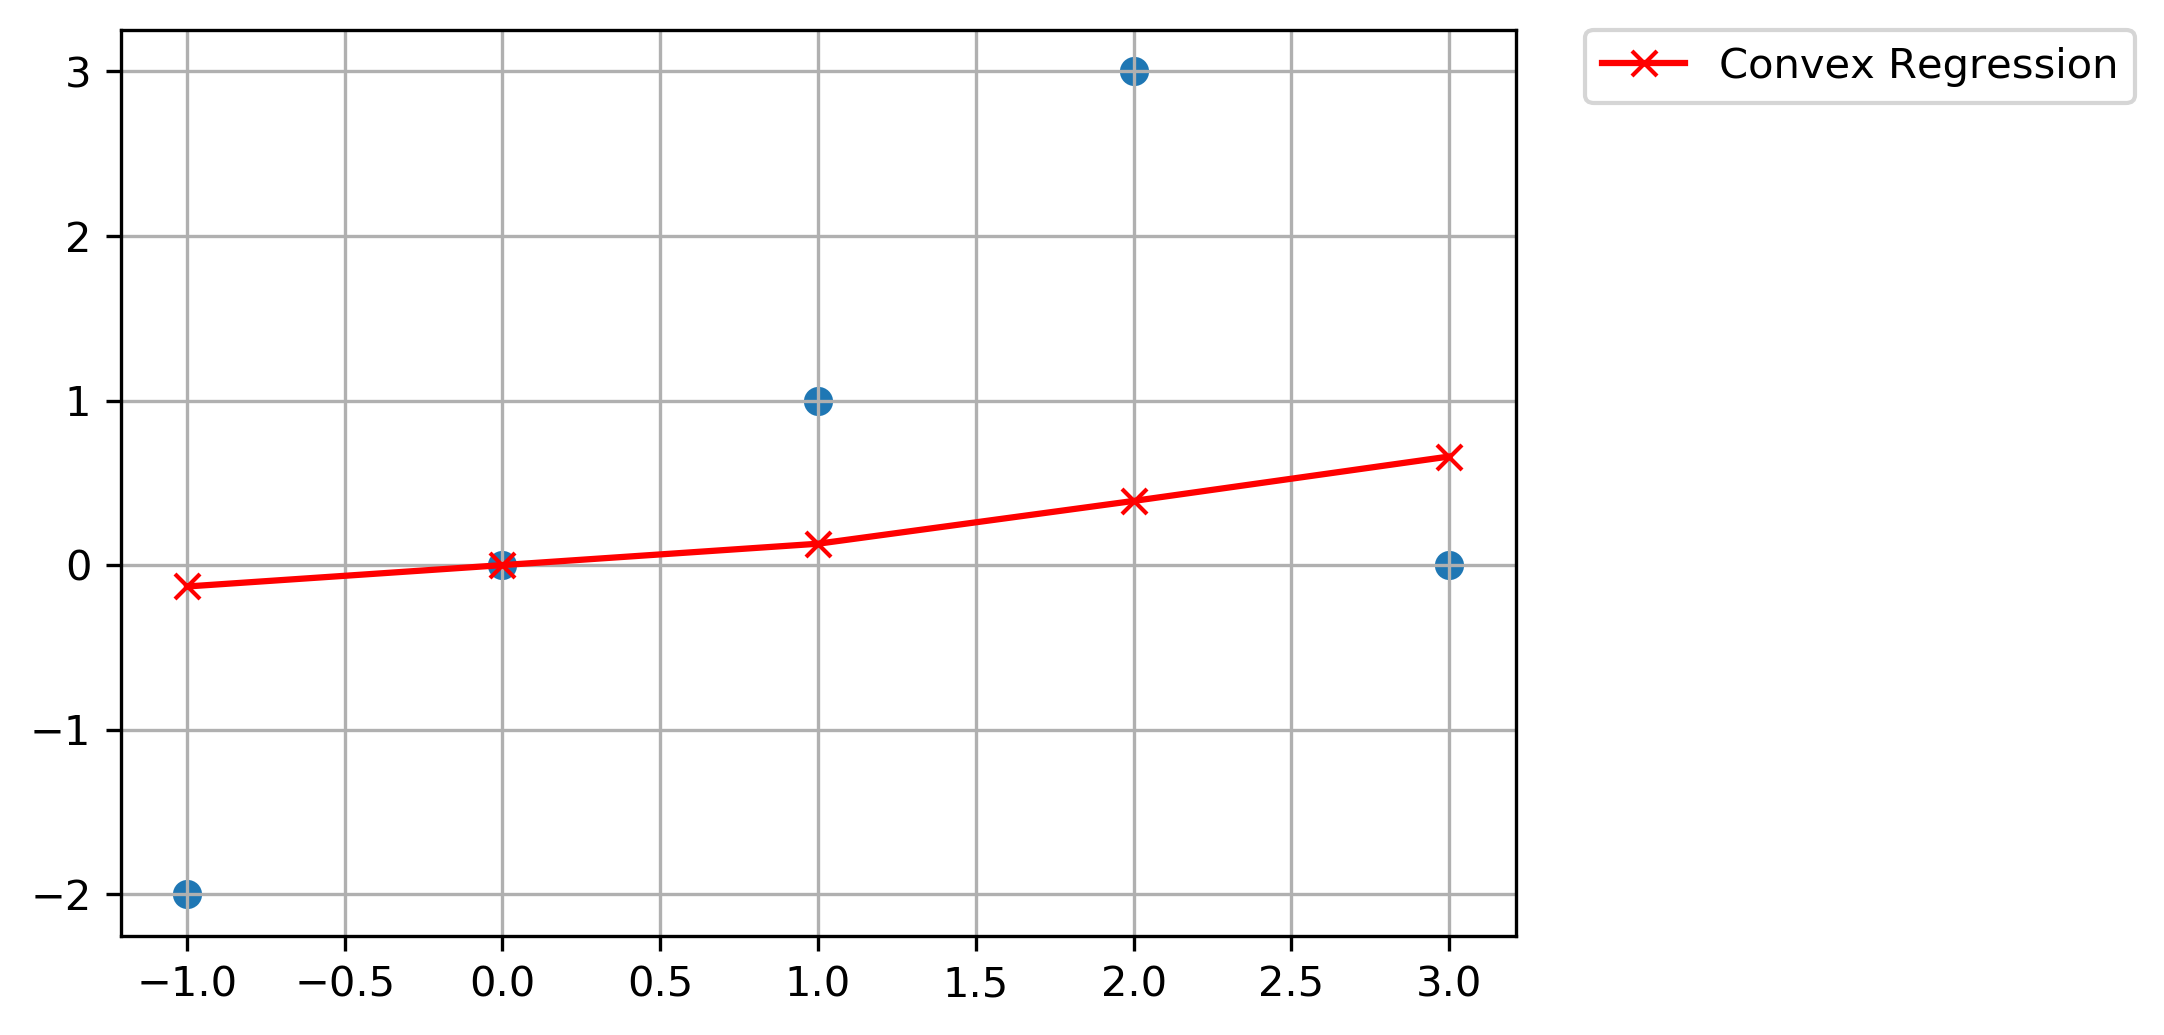

<IPython.core.display.Javascript object>

In [16]:
plt.plot(
    points[:, 0], np.round(y.value, 2), "-x", c="red", label=r"Convex Regression",
)
plt.scatter(*list(zip(*points)))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()